## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/sophielee/Documents/NOLA Police Report 2018.csv")

In [3]:
df.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Offender_Race,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,D-23482-18,6,23XX Milan St,CLOSED,67,THEFT,2018-04-20 07:32:00,54 186,THEFT,BLACK,...,42.0,1.0,VICTIM,BLACK,FEMALE,39.0,1.0,Non-fatal,NaN,Supplemental Report
1,E-13975-18,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,MALE,38.0,1.0,Non-fatal,NaN,Incident Report
2,D-34501-18,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,HISPANIC,...,19.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
3,E-12091-18,8,15XX Pauger St,OPEN,67,THEFT,2018-05-10 03:30:00,14 67,THEFT,WHITE,...,NaN,1.0,VICTIM,BLACK,MALE,61.0,1.0,Non-fatal,NaN,Incident Report
4,J-05614-18,8,5XX Chartres St,UNFOUNDED,62B,SIMPLE BURGLARY (BUSINESS),2018-10-05 01:00:00,NaN,NaN,NaN,...,NaN,NaN,INTERVIEW,WHITE,MALE,33.0,1.0,Non-fatal,NaN,Supplemental Report


## Cleaning up the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122529 entries, 0 to 122528
Data columns (total 21 columns):
Item_Number            122529 non-null object
District               122529 non-null int64
Location               122529 non-null object
Disposition            122529 non-null object
Signal_Type            122529 non-null object
Signal_Description     122529 non-null object
Occurred_Date_Time     122529 non-null object
Charge_Code            57202 non-null object
Charge_Description     57202 non-null object
Offender_Race          59007 non-null object
Offender_Gender        56303 non-null object
Offender_Age           39457 non-null float64
Offender_Number        77688 non-null float64
Person_Type            118447 non-null object
Victim_Race            91231 non-null object
Victim_Gender          91519 non-null object
Victim_Age             85198 non-null float64
Victim_Number          118447 non-null float64
Victim_Fatal_Status    122529 non-null object
Hate_Crime           

In [5]:
df.drop(['Offender_Race', 'Offender_Gender', 'Offender_Age', 'Offender_Number',
         'Person_Type', 'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Number', 'Hate_Crime'], axis=1, inplace=True)

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122529 entries, 0 to 122528
Data columns (total 11 columns):
Item_Number            122529 non-null object
District               122529 non-null int64
Location               122529 non-null object
Disposition            122529 non-null object
Signal_Type            122529 non-null object
Signal_Description     122529 non-null object
Occurred_Date_Time     122529 non-null object
Charge_Code            57202 non-null object
Charge_Description     57202 non-null object
Victim_Fatal_Status    122529 non-null object
Report_Type            122529 non-null object
dtypes: int64(1), object(10)
memory usage: 10.3+ MB


Item_Number                0
District                   0
Location                   0
Disposition                0
Signal_Type                0
Signal_Description         0
Occurred_Date_Time         0
Charge_Code            65327
Charge_Description     65327
Victim_Fatal_Status        0
Report_Type                0
dtype: int64

In [7]:
df['Victim_Fatal_Status'].value_counts()

Non-fatal    121716
Fatal           813
Name: Victim_Fatal_Status, dtype: int64

Fatal cases were a small fraction of the crimes committed in 2018

## Exploring the Dataset

We want to see how many different types of crimes were committed in 2018

In [8]:
df['Charge_Description'].value_counts()

THEFT                                   9411
SIMPLE BURGLARY                         5462
SIMPLE CRIMINAL DAMAGE TO PROPERTY      4610
WARRANT ISSUED BY                       3567
DOMESTIC ABUSE BATTERY                  2541
                                        ... 
UNAUTHORIZED USE OF FOOD STAMPS            1
CONCEALING IDENTITY (VEHICLE/ENGINE)       1
PRINCIPAL TO SIMPLE ESCAMP                 1
ONE WAY ROADWAYS & TRAFFIC ISLANDS         1
LIGHTED LAMPS REQUIRED                     1
Name: Charge_Description, Length: 405, dtype: int64

In [9]:
# creating a new column 'Month' to find monthly trend rather than daily

df['Month'] = pd.to_datetime(df['Occurred_Date_Time']).dt.to_period('M')

Plotting the top 10 crimes

In [10]:
df.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Victim_Fatal_Status,Report_Type,Month
0,D-23482-18,6,23XX Milan St,CLOSED,67,THEFT,2018-04-20 07:32:00,54 186,THEFT,Non-fatal,Supplemental Report,2018-04
1,E-13975-18,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,NaN,Non-fatal,Incident Report,2018-05
2,D-34501-18,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,Non-fatal,Incident Report,2018-04
3,E-12091-18,8,15XX Pauger St,OPEN,67,THEFT,2018-05-10 03:30:00,14 67,THEFT,Non-fatal,Incident Report,2018-05
4,J-05614-18,8,5XX Chartres St,UNFOUNDED,62B,SIMPLE BURGLARY (BUSINESS),2018-10-05 01:00:00,NaN,NaN,Non-fatal,Supplemental Report,2018-10


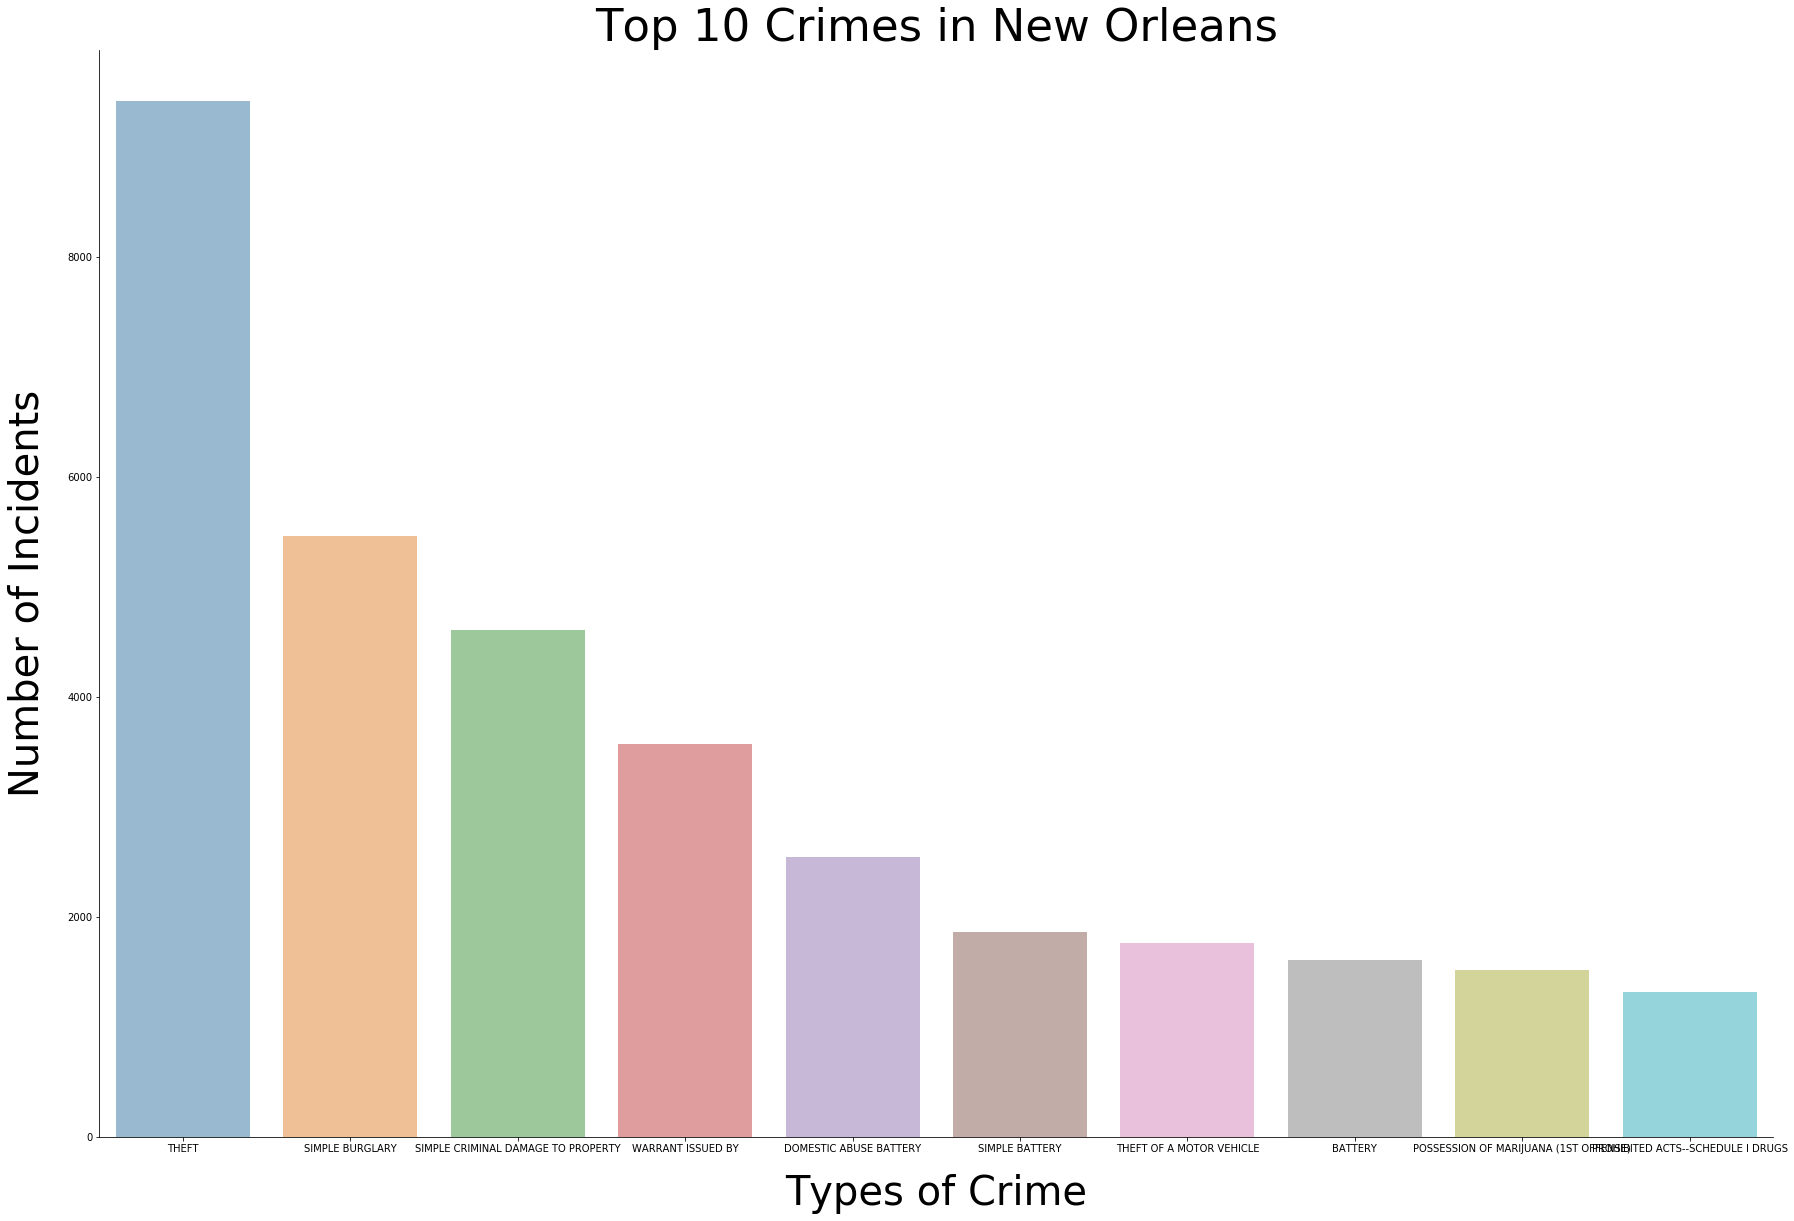

In [11]:
crime_count = df['Charge_Description'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(30,20))
sns.barplot(crime_count.index, crime_count.values, alpha=0.5)

plt.title('Top 10 Crimes in New Orleans', fontsize=45)
plt.ylabel('Number of Incidents', fontsize=40, labelpad= 20)
plt.xlabel('Types of Crime', fontsize=40, labelpad=20)
sns.despine()

plt.rcParams["axes.labelsize"]=40

plt.show()

df.drop(['Occurred_Date_Time'], axis=1, inplace=True)

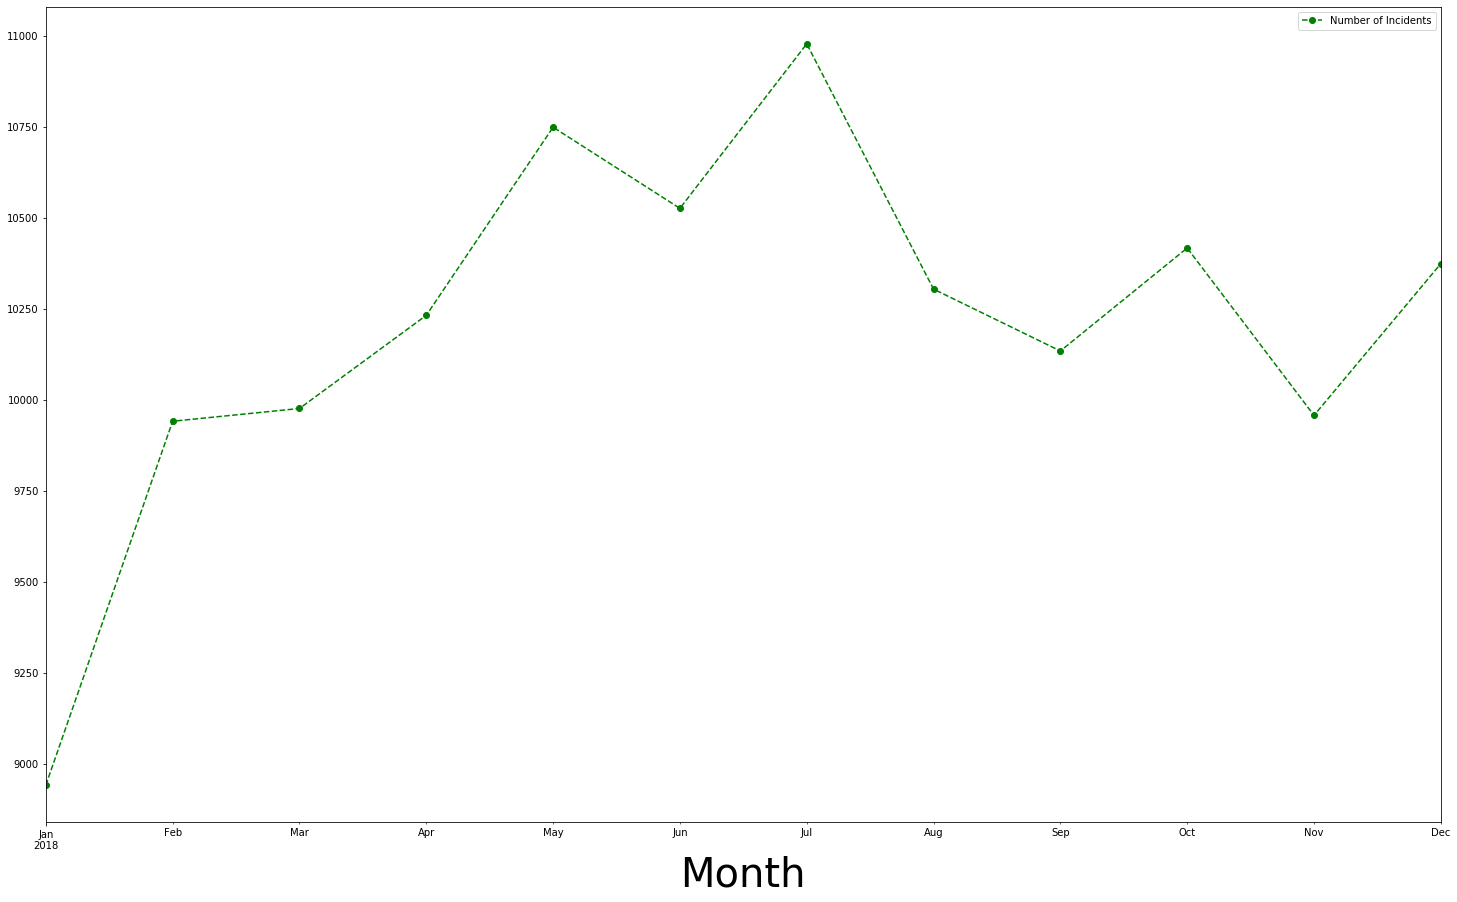

In [25]:
MonthlyPlot = df.groupby('Month').size().reset_index(name='Number of Incidents').set_index('Month')
MonthlyPlot.plot(kind='line', figsize=(25,15), marker='o', linestyle='--', color='green')

November was a month with the least amount of crimes and July was the month with the highest number of crimes

Finding the neighbourhoods with the most crimes. The following are the districts of New Orleans:


* 1st District – Tremé, Mid-City
* 2nd District – Uptown, Carrollton
* 3rd District – Gentilly, Lakeview, Westend
* 4th District – Algiers, English Turn
* 5th District – 7th Ward, 8th Ward, 9th Ward, Bywater, Desire
* 6th District – Irish Channel, Central City, Garden District
* 7th District – New Orleans East
* 8th District – French Quarter, Central Business Dist. (CBD), Warehouse District, Marigny Triangle

In [27]:
# the districts are labeled with number in the current dataset so we are converting them to string

df['District'] = df['District'].astype('str')

df['District'].replace(to_replace=['1'], value=['Tremé/Mid-City'], inplace=True)
df['District'].replace(to_replace=['2'], value=['Uptown/Carrollton'], inplace=True)
df['District'].replace(to_replace=['3'], value=['Gentilly/Lakeview/Westend'], inplace=True)
df['District'].replace(to_replace=['4'], value=['Algiers/English Turn'], inplace=True)
df['District'].replace(to_replace=['5'], value=['7th Ward/8th Ward/9th Ward/Bywater/Desire'], inplace=True)
df['District'].replace(to_replace=['6'], value=['Irish Channel/Central City/Garden District'], inplace=True)
df['District'].replace(to_replace=['7'], value=['New Orleans East'], inplace=True)
df['District'].replace(to_replace=['8'], value=['French Quarter/Central Business District/Warehouse District/Marigny Triangle'],
                       inplace=True)

In [28]:
df['District'].head()

0           Irish Channel/Central City/Garden District
1                                 Algiers/English Turn
2                            Gentilly/Lakeview/Westend
3    French Quarter/Central Business District/Wareh...
4    French Quarter/Central Business District/Wareh...
Name: District, dtype: object

In [30]:
# Districts with high crime rates, ordered by the count

count_per_district = df.groupby(['District']).size().reset_index(name='Counts').sort_values('Counts', ascending=False)

result = count_per_district.head(10)
result

,District,Counts
5,New Orleans East,21131
0,7th Ward/8th Ward/9th Ward/Bywater/Desire,17712
2,French Quarter/Central Business District/Wareh...,17583
4,Irish Channel/Central City/Garden District,14945
3,Gentilly/Lakeview/Westend,13674
1,Algiers/English Turn,13448
6,Tremé/Mid-City,12092
7,Uptown/Carrollton,11944


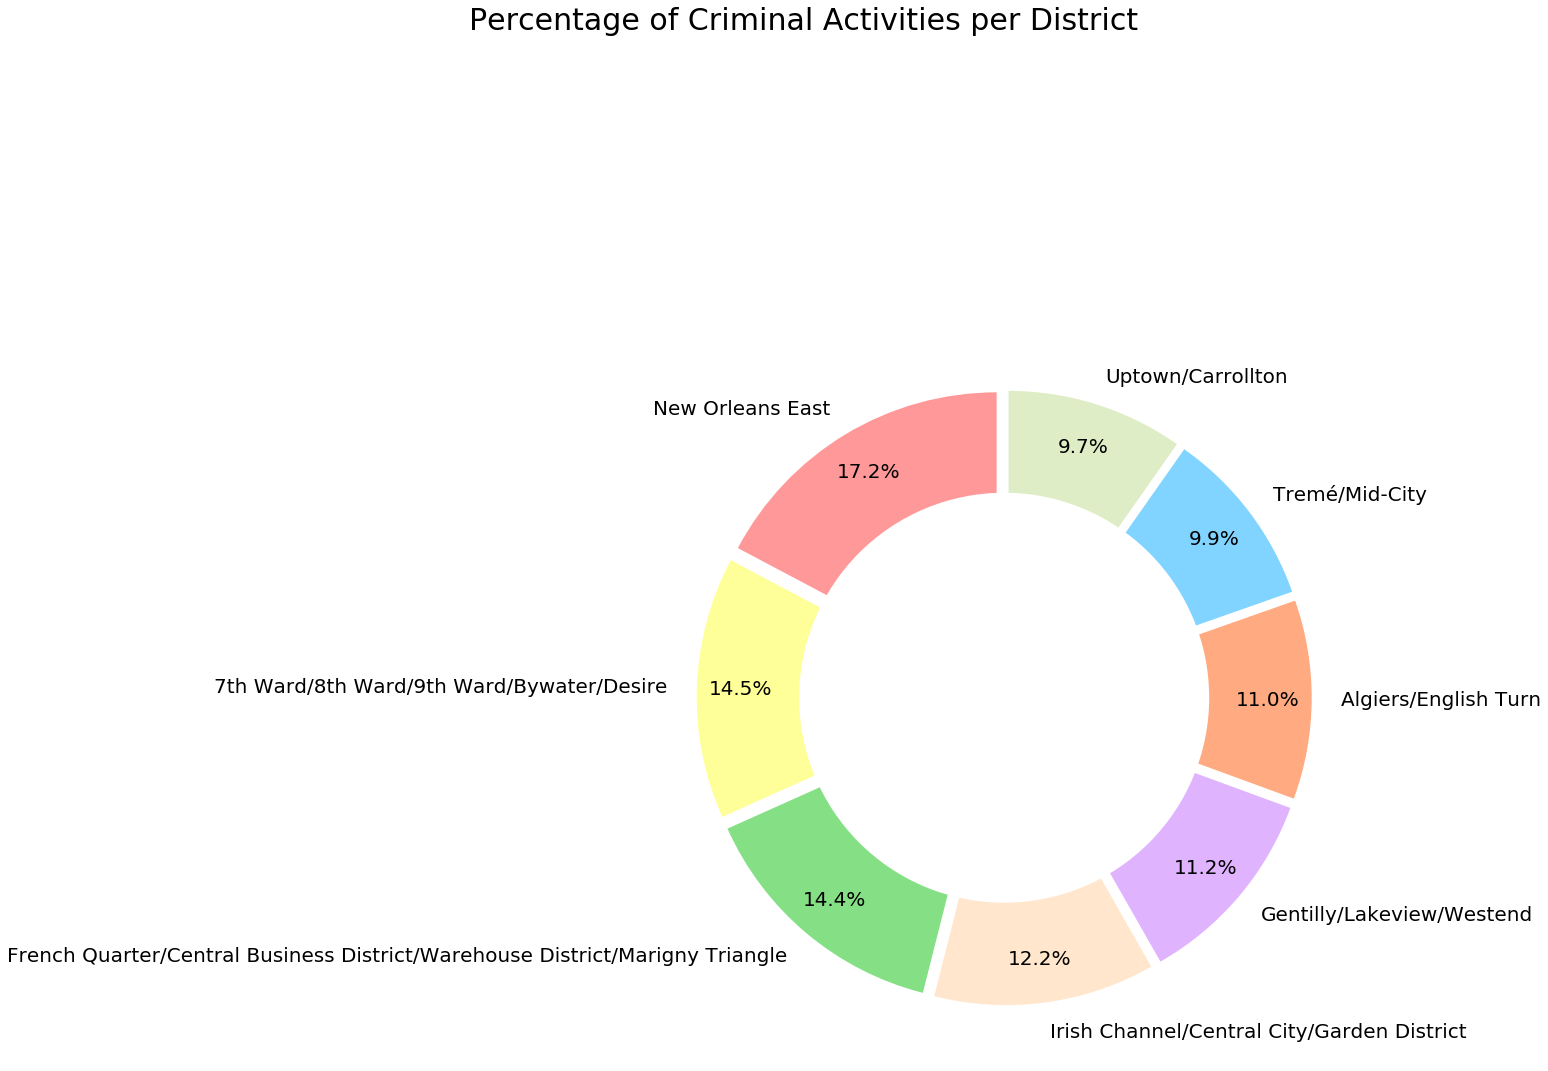

In [32]:
labels = result['District']
values = result['Counts']
colors = ['#ff9999','#ffff99','#85e085','#ffe6cc', '#e0b3ff', '#ffaa80', '#80d4ff', '#deedc6']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.figure(figsize=(20,20))
plt.pie(values, colors=colors, labels=labels, autopct='%1.1f%%', shadow=False, pctdistance=0.85,
       startangle=90, explode=explode, textprops={'fontsize':20})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.suptitle('Percentage of Criminal Activities per District', fontsize=30)

plt.tight_layout()
plt.show()